# K-means from Scratch – Part 1: Data Generation

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import math 
np.random.seed(0)
%matplotlib inline

Generate a random cluster dataset to
experiment on X = coordinate points, y =
cluster labels, and define random centroids.

In [ ]:
X, y = make_blobs(n_samples=1500, centers=3, \
n_features=2, random_state=800)
centroids = [[-6,2],[3,-4],[-5,10]]
X

array([[-3.83458347,  6.09210705],
       [-4.62571831,  5.54296865],
       [-2.87807159, -7.48754592],
       ...,
       [-3.709726  , -7.77993633],
       [-8.44553266, -1.83519866],
       [-4.68308431,  6.91780744]])

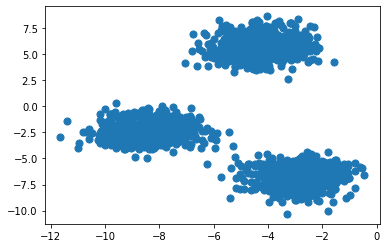

In [ ]:
plt.scatter(X[:, 0], X[:, 1], s=50, cmap='tab20b')
plt.show()

In [ ]:
# These labels will not be known to us in
# practice.
y

array([2, 2, 1, ..., 1, 0, 2])

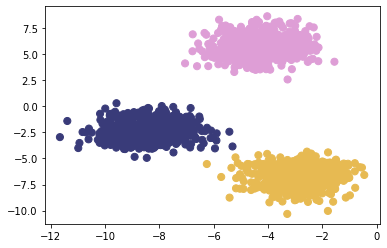

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y,s=50, cmap='tab20b')
plt.show()

WE have
generated the data and visually explored how it is
put together. By visualizing the ground truth, we
have established a baseline that provides a relative
metric for algorithm accuracy.

# Implementing k-means

In [ ]:
from scipy.spatial.distance import cdist

In [ ]:
X[105:110]

array([[-3.09897933,  4.79407445],
       [-3.37295914, -7.36901393],
       [-3.372895  ,  5.10433846],
       [-5.90267987, -3.28352194],
       [-3.52067739,  7.7841276 ]])

In [ ]:
"""
Finds distances from each of 5 sampled
points to all of the centroids
"""
for x in X[105:110]:
    calcs = cdist(x.reshape([1,-1]),centroids).squeeze()
    print(calcs, "Cluster Membership: ",np.argmin(calcs))

[ 4.02775036 10.70202291  5.54216027] Cluster Membership:  0
[ 9.7303528   7.20866583 17.44505393] Cluster Membership:  1
[ 4.06676751 11.11317999  5.15897011] Cluster Membership:  0
[ 5.28441816  8.93146403 13.31415736] Cluster Membership:  0
[ 6.29310516 13.46792103  2.66429839] Cluster Membership:  2


In [ ]:
# Keep track of history so you can see K-Means in action
    centroids_history = []
    labels_history = []

def k_means(X, K):
# Keep track of history so you can see K-Means in action
    # centroids_history = []
    # labels_history = []
    rand_index =np.random.choice(X.shape[0], K)
    centroids = X[rand_index]
    centroids_history.append(centroids)

In [ ]:
history = zip(centroids_history , labels_history)
for x, y in history:
    plt.figure(figsize=(4,3))
    plt.scatter(X[:, 0], X[:, 1], c=y,s=50, cmap='tab20b');
    plt.scatter(x[:, 0], x[:, 1],c='red').show()

NameError: ignored

k-means takes
an iterative approach to refine optimal clusters
based on distance. The algorithm starts with
random initialization of centroids and, depending
on the complexity of the data, quickly finds the
separations that make the most sense.